In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


**Importing libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPool2D,BatchNormalization

In [3]:
train_df = pd.read_csv('../input/digit-recognizer/train.csv')
test_df = pd.read_csv('../input/digit-recognizer/test.csv')

In [4]:
train_df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(train_df.shape)

(42000, 785)


In [7]:
print(test_df.shape)

(28000, 784)


AxesImage(54,36;334.8x217.44)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


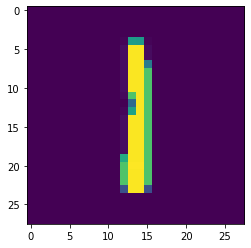

In [8]:
X = train_df.drop('label',axis=1)
y = train_df['label']
X = X.values.reshape(-1,28,28,1)
X = X/255
y = to_categorical(y)
print(plt.imshow(X[2][:,:,0]))
print(str(y[1]))

**Spliting into train and test set**

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [10]:
datagen = ImageDataGenerator(zoom_range = 0.1, width_shift_range = 0.1, height_shift_range = 0.1, rotation_range = 10) 

In [11]:
model = Sequential()

**Building Model**

In [12]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (5, 5), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides = (2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

**Compiling Model**

In [13]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

**Reducing Learning Rate**

In [14]:
reduction_lr = ReduceLROnPlateau(monitor='val_accuracy',patience=2, verbose=1, factor=0.2, min_lr=0.00001)

**Training a Model**

In [15]:
hist = model.fit_generator(datagen.flow(X_train,y_train,batch_size=32),epochs=20,validation_data = (X_test,y_test),callbacks=[reduction_lr])

Epoch 1/20
919/919 [==============================] - 13s 14ms/step - loss: 0.4438 - accuracy: 0.8610 - val_loss: 0.0842 - val_accuracy: 0.9755 - lr: 0.0010
Epoch 2/20
919/919 [==============================] - 13s 14ms/step - loss: 0.1674 - accuracy: 0.9534 - val_loss: 0.0596 - val_accuracy: 0.9835 - lr: 0.0010
Epoch 3/20
919/919 [==============================] - 13s 14ms/step - loss: 0.1409 - accuracy: 0.9612 - val_loss: 0.0441 - val_accuracy: 0.9883 - lr: 0.0010
Epoch 4/20
919/919 [==============================] - 14s 15ms/step - loss: 0.1181 - accuracy: 0.9674 - val_loss: 0.0343 - val_accuracy: 0.9903 - lr: 0.0010
Epoch 5/20
919/919 [==============================] - 12s 13ms/step - loss: 0.1134 - accuracy: 0.9697 - val_loss: 0.0410 - val_accuracy: 0.9890 - lr: 0.0010
Epoch 6/20
915/919 [============================>.] - ETA: 0s - loss: 0.1007 - accuracy: 0.9734
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
919/919 [=============================

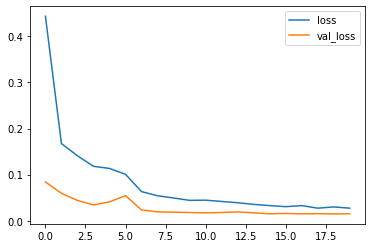

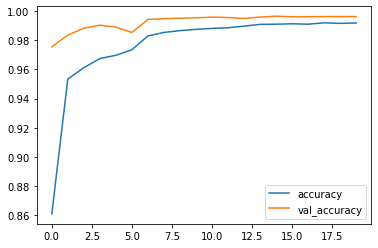

In [16]:
loss = pd.DataFrame(model.history.history)
loss[['loss', 'val_loss']].plot()
loss[['accuracy', 'val_accuracy']].plot()

In [17]:
final_loss, final_acc = model.evaluate(X_test, y_test, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0151, final accuracy: 0.9962


**Testing a Model**

In [18]:
test_df = test_df.values.reshape(-1, 28, 28, 1) / 255
y_pred = model.predict(test_df, batch_size = 64)

y_pred = np.argmax(y_pred,axis = 1)
y_pred = pd.Series(y_pred,name="Label")
y_pred

0        2
1        0
2        9
3        0
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

**Submission**

In [19]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),y_pred],axis = 1)
submission.to_csv("submission.csv",index=False)

**If You find This is useful,please UPVOTE.**